In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

from os.path import join, exists, isfile, isdir, abspath, dirname, basename, realpath
from os import makedirs, listdir, pardir, getcwd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
parent_dir = abspath(join(join(getcwd(), pardir), pardir))
data_dir = join(parent_dir, 'data')

In [4]:
import networkx as nx
import numpy as np
from mayavi import mlab

# some graphs to try
# H=nx.krackhardt_kite_graph()
# H=nx.Graph();H.add_edge('a','b');H.add_edge('a','c');H.add_edge('a','d')
# H=nx.grid_2d_graph(4,5)
H = nx.cycle_graph(20)

# reorder nodes from 0,len(G)-1
G = nx.convert_node_labels_to_integers(H)
# 3d spring layout
pos = nx.spring_layout(G, dim=3, seed=1001)
# numpy array of x,y,z positions in sorted node order
xyz = np.array([pos[v] for v in sorted(G)])
# scalar colors
scalars = np.array(list(G.nodes())) + 5

mlab.figure()

pts = mlab.points3d(
    xyz[:, 0],
    xyz[:, 1],
    xyz[:, 2],
    scalars,
    scale_factor=0.1,
    scale_mode="none",
    colormap="Blues",
    resolution=20,
)

pts.mlab_source.dataset.lines = np.array(list(G.edges()))
tube = mlab.pipeline.tube(pts, tube_radius=0.01)
mlab.pipeline.surface(tube, color=(0.8, 0.8, 0.8))
mlab.orientation_axes()

ModuleNotFoundError: No module named 'mayavi'

In [23]:
#create the graphs
#sampleDraw is created for the subgraphs' visualization
graph_fly=nx.DiGraph()
graph_fly.clear()
graph_sworm=nx.DiGraph()
graph_sworm.clear()
graph_fly_sampleDraw=nx.DiGraph()
graph_fly_sampleDraw.clear()
graph_sworm_sampleDraw=nx.DiGraph()
graph_sworm_sampleDraw.clear()

In [24]:
#import the data
#data source: https://www.inetbio.org/wormnet/downloadnetwork.php
file_fly = pd.read_csv(join(data_dir, "DM-HT.txt"), sep="\t",header=None)
file_sworm = pd.read_csv(join(data_dir, "CE-HT.txt"), sep="\t",header=None)
file_fly_sampleDraw=file_fly.head(5)
file_sworm_sampleDraw=file_sworm.head(5)

In [25]:
file_fly_sampleDraw

,0,1,2
0,4R79.2,F33A8.4,2.053510
1,4R79.2,K08E4.1,1.718166
2,4R79.2,Y37E3.9,2.053510
3,4R79.2,Y59A8B.1,2.038247
4,AC3.2,C55A6.10,1.453145


In [26]:
#add data into directed graphs with weights
for row in file_fly.iterrows():
    graph_fly.add_edge(row[1][0],row[1][1],weight=row[1][2])
for row in file_sworm.iterrows():
    graph_sworm.add_edge(row[1][0],row[1][1],weight=row[1][2])
for row in file_fly_sampleDraw.iterrows():
    graph_fly_sampleDraw.add_edge(row[1][0],row[1][1],weight=round(float(row[1][2]),2))
for row in file_sworm_sampleDraw.iterrows():
    graph_sworm_sampleDraw.add_edge(row[1][0],row[1][1],weight=row[1][2])

{('4R79.2', 'F33A8.4'): Text(-0.12500000000000006, -0.3, '2.05'),
 ('4R79.2', 'K08E4.1'): Text(-0.65, 0.04999999999999999, '1.72'),
 ('4R79.2', 'Y37E3.9'): Text(-0.5625, -0.03749999999999999, '2.05'),
 ('4R79.2',
  'Y59A8B.1'): Text(-0.47500000000000003, -0.12499999999999999, '2.04'),
 ('AC3.2',
  'C55A6.10'): Text(0.31249999999999994, -0.03749999999999998, '1.45')}

(-1.2799999999999998, 1.0299999999999998, -0.412, 0.5119999999999999)

Text(0.5, 1.0, "Subgraph of Flies' Protein-protien Interactions")

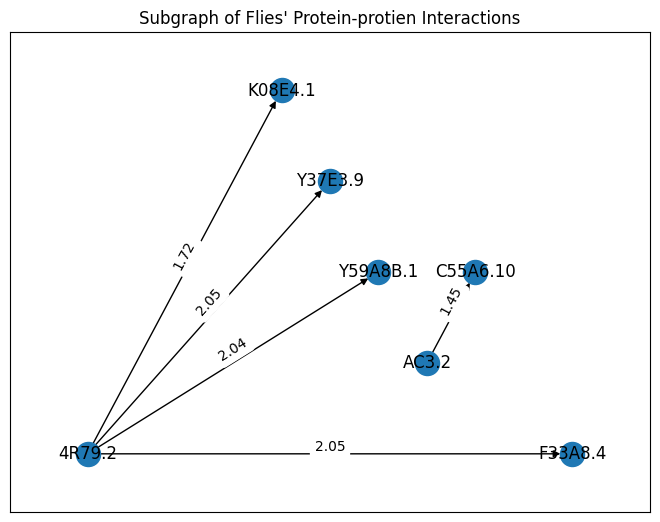

In [27]:
#draw the sample subgraph in matplotlib
pos=nx.planar_layout(graph_fly_sampleDraw)
labels = nx.get_edge_attributes(graph_fly_sampleDraw,'weight')
nx.draw(graph_fly_sampleDraw,with_labels=True,pos=pos)
nx.draw_networkx_edge_labels(graph_fly_sampleDraw,pos=pos,edge_labels=labels,verticalalignment="bottom",font_size=10)
ax = plt.gca()
ax.margins(0.1)
plt.axis("on")
plt.title("Subgraph of Flies' Protein-protien Interactions")
plt.show()

————————————————————————————————————
**Graph algorithms**  
references:
https://networkx.org/documentation/networkx-1.10/reference/algorithms.centrality.html

In [28]:
nx.degree_centrality(graph_fly_sampleDraw)

{'4R79.2': 0.6666666666666666,
 'F33A8.4': 0.16666666666666666,
 'K08E4.1': 0.16666666666666666,
 'Y37E3.9': 0.16666666666666666,
 'Y59A8B.1': 0.16666666666666666,
 'AC3.2': 0.16666666666666666,
 'C55A6.10': 0.16666666666666666}

In [29]:
nx.in_degree_centrality(graph_fly_sampleDraw)

{'4R79.2': 0.0,
 'F33A8.4': 0.16666666666666666,
 'K08E4.1': 0.16666666666666666,
 'Y37E3.9': 0.16666666666666666,
 'Y59A8B.1': 0.16666666666666666,
 'AC3.2': 0.0,
 'C55A6.10': 0.16666666666666666}

In [30]:
nx.betweenness_centrality(graph_fly_sampleDraw)

{'4R79.2': 0.0,
 'F33A8.4': 0.0,
 'K08E4.1': 0.0,
 'Y37E3.9': 0.0,
 'Y59A8B.1': 0.0,
 'AC3.2': 0.0,
 'C55A6.10': 0.0}

In [31]:
#nx.current_flow_betweenness_centrality(graph_fly_sampleDraw)
#for undirected graphs only

In [32]:
nx.closeness_centrality(graph_fly_sampleDraw)

{'4R79.2': 0.0,
 'F33A8.4': 0.16666666666666666,
 'K08E4.1': 0.16666666666666666,
 'Y37E3.9': 0.16666666666666666,
 'Y59A8B.1': 0.16666666666666666,
 'AC3.2': 0.0,
 'C55A6.10': 0.16666666666666666}

In [33]:
# nx.eigenvector_centrality(graph_fly_sampleDraw)
# for connected graphs only

In [34]:
#nx.current_flow_closeness_centrality(graph_fly_sampleDraw)
#for undirected graphs only

In [35]:
#nx.communicability(graph_fly_sampleDraw)
#for undirected graphs only

In [36]:
nx.load_centrality(graph_fly_sampleDraw)

{'4R79.2': 0.0,
 'F33A8.4': 0.0,
 'K08E4.1': 0.0,
 'Y37E3.9': 0.0,
 'Y59A8B.1': 0.0,
 'AC3.2': 0.0,
 'C55A6.10': 0.0}